In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
cd ../../path_to_creditcard.csv

[Errno 2] No such file or directory: '../../path_to_creditcard.csv'
/content/drive/My Drive/Colab Notebooks


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
import seaborn as sns

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report


data = pd.read_csv("creditcard.csv")  #Cargando la base de datos

data.shape  #Cantidad de Filas y Columnas de la base de datos


(284807, 31)

In [17]:
data.head(10) #Mostrando las 10 primeras filas

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [ ]:
data["Class"].value_counts()  # Mostrando l cantidad de fraudes 1 y no fraudes 0 de la base de datos

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
total = data.shape[0] #Numero de filas
fraude = data[data['Class'] == 1]
no_fraude = data[data['Class'] == 0]

x = len(fraude)/total
y = len(no_fraude)/total

print('fraude :',x*100,'%')  #Porcentaje de fraudes
print('no fraude :',y*100,'%')  #Porcentaje de no fraudes

print(len(fraude))

fraude : 0.1727485630620034 %
no fraude : 99.82725143693798 %
492


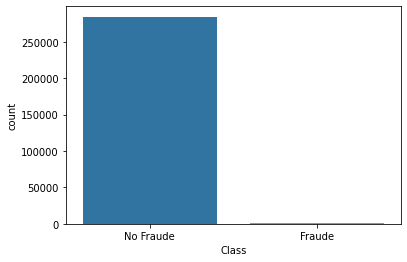

In [ ]:
g = sns.countplot(data['Class'])
g.set_xticklabels(['No Fraude','Fraude'])
plt.show()

In [ ]:
fraude.Amount.describe()  # Estadisticas de fraude

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
no_fraude.Amount.describe() # Estadisticas de no fraude

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [ ]:
# Muestra de 20000
data_20000 = data[:20000]
data_20000.shape

(20000, 31)

In [ ]:
data_20000["Class"].value_counts()
data20000_etiquetas = data_20000["Class"]
data20000_etiquetas.shape

(20000,)

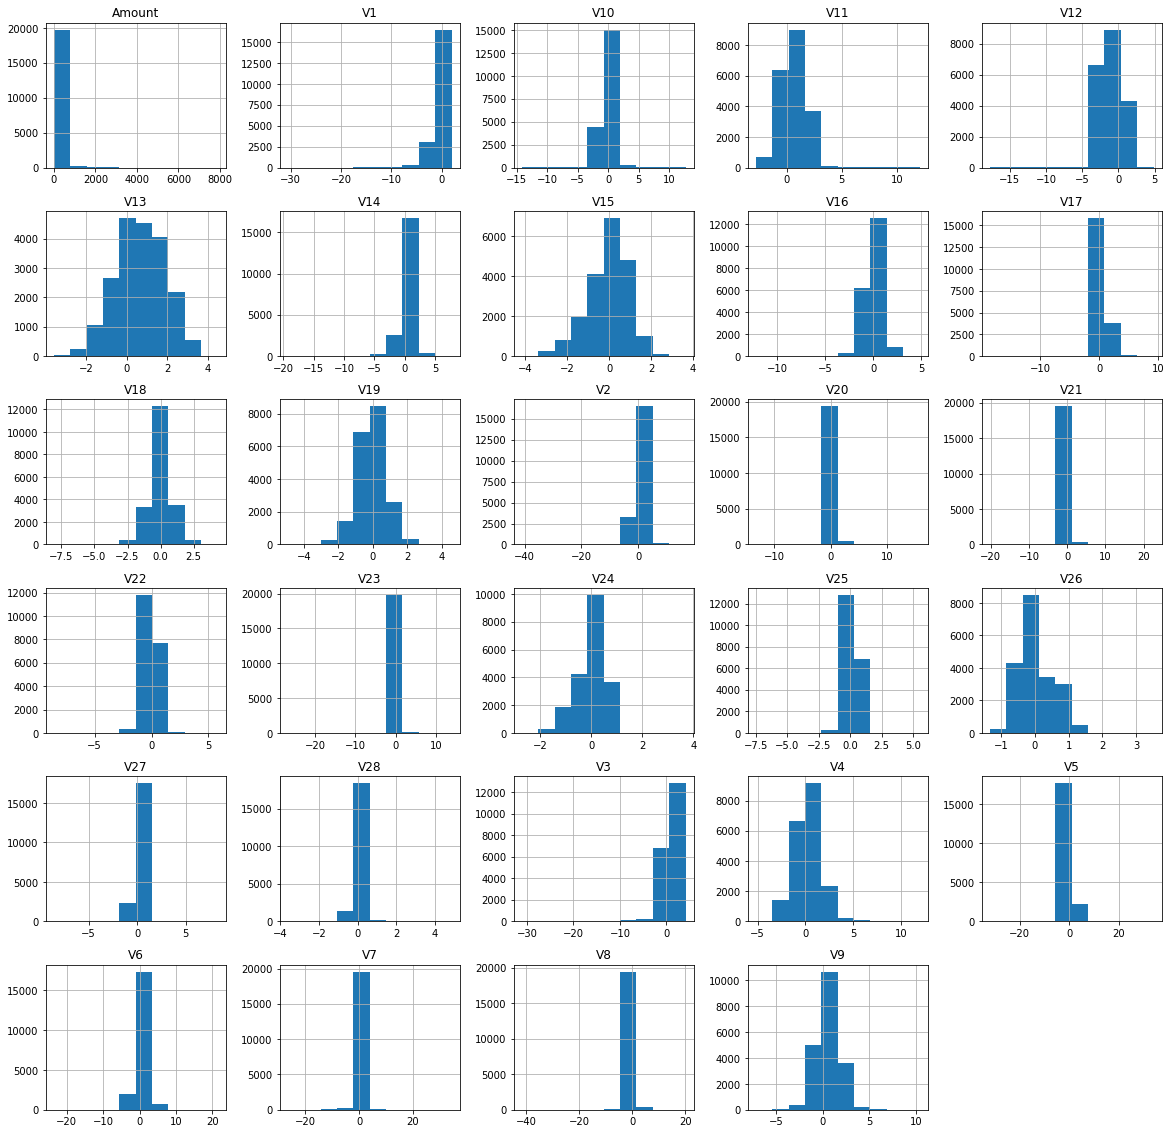

In [ ]:
data20000 = data_20000.drop(["Time","Class"], axis=1)
data20000.shape

data20000.hist(figsize = (20, 20))
plt.show()

In [ ]:
data20000_Std = StandardScaler().fit_transform(data20000)
print(data20000_Std.shape)

(20000, 29)


In [ ]:
train_caracteristicas = data20000_Std[0:16000]
test_caracteristicas = data20000_Std[16000:20000]
train_etiquetas = data20000_etiquetas[0:16000]
test_etiquetas = data20000_etiquetas[16000:20000]

#k_nearest_neighbours

# Buscando el mejor K
lista = list(range(0,50))
neighbors = list(filter(lambda x: x%2!=0, lista))  #Lista de numeros impares de entre 0-50

CV_Scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors = k, algorithm = 'kd_tree',n_jobs=-1)
    scores = cross_val_score(knn, train_caracteristicas, train_etiquetas, cv = 5, scoring='recall')
    CV_Scores.append(scores.mean())

CV_Scores

[0.7285714285714286,
 0.5276190476190477,
 0.5142857142857143,
 0.5009523809523809,
 0.48761904761904756,
 0.5009523809523809,
 0.48571428571428577,
 0.48476190476190484,
 0.4838095238095238,
 0.46952380952380957,
 0.46952380952380957,
 0.42666666666666664,
 0.6,
 0.5571428571428572,
 0.5,
 0.45714285714285713,
 0.41428571428571426,
 0.4,
 0.4,
 0.38666666666666666,
 0.38666666666666666,
 0.42857142857142866,
 0.5085714285714286,
 0.5085714285714286,
 0.49523809523809526]

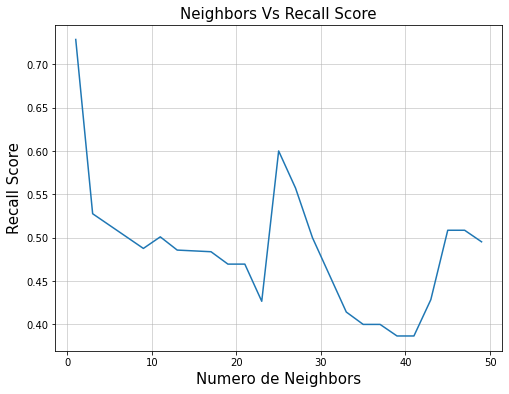

In [ ]:

plt.figure(figsize = (8, 6))
plt.plot(neighbors, CV_Scores)
plt.title("Neighbors Vs Recall Score", fontsize=15)
plt.xlabel("Numero de Neighbors", fontsize=15)
plt.ylabel("Recall Score", fontsize=15)
plt.grid(linestyle='-', linewidth=0.5)    


In [ ]:
accuracy =np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn=KNeighborsClassifier(n_neighbors=k,algorithm="kd_tree",n_jobs=-1)
    knn.fit(train_caracteristicas, train_etiquetas)
    accuracy[i] = knn.score(train_caracteristicas, train_etiquetas)


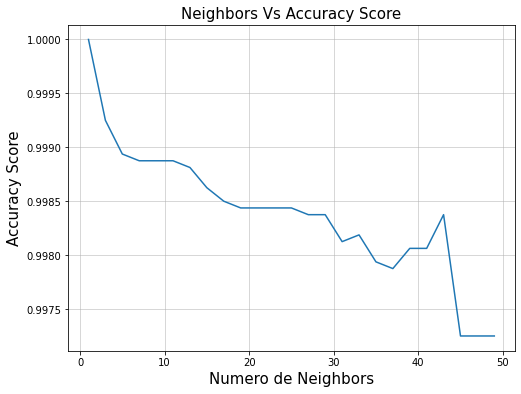

In [ ]:
plt.figure(figsize = (8, 6))
plt.title('Neighbors Vs Accuracy Score', fontsize=15)
plt.plot(neighbors, accuracy)
plt.xlabel('Numero de Neighbors', fontsize=15)
plt.ylabel('Accuracy Score', fontsize=15)
plt.grid(linestyle='-', linewidth=0.5)
plt.show()

In [ ]:
best_k = neighbors[CV_Scores.index(max(CV_Scores))]
best_k

1

In [ ]:
accuracy = list(accuracy)
best_k = neighbors[accuracy.index(max(accuracy))]
best_k

1

In [ ]:
caracteristicas=data.drop(["Time","Class"],axis=1)
etiqueta=pd.DataFrame(data[["Class"]])

caracteristicas=caracteristicas.values
etiqueta=etiqueta.values

#Normalizando los datos
train_caracteristicas,test_caracteristicas,train_etiquetas,test_etiquetas=train_test_split(caracteristicas,etiqueta,train_size=0.90)  #test_size = 0.1
train_caracteristicas=normalize(train_caracteristicas)
test_caracteristicas=normalize(test_caracteristicas)

KNN_best = KNeighborsClassifier(n_neighbors = best_k, algorithm = 'kd_tree',n_jobs=-1)

KNN_best.fit(train_caracteristicas, train_etiquetas.ravel())

prediccion = KNN_best.predict(test_caracteristicas)

#Matriz de Confusion
tn,fp,fn,tp=confusion_matrix(test_etiquetas, prediccion).ravel()
#cm = confusion_matrix(test_etiquetas, prediccion)
#print(cm)

#Puntuaciones
knn_accuracy_score=accuracy_score(test_etiquetas, prediccion)
knn_recall_score=recall_score(test_etiquetas, prediccion)
knn_f1_score=f1_score(test_etiquetas, prediccion)

print("K-Nearest Neighbours")
print("Matrix de Confusion")
print("tn =",tn,"fp =",fp)
print("fn =",fn,"tp =",tp)
print("Scores")
print("Accuracy -->",knn_accuracy_score)
print("Recall -->",knn_recall_score)
print("F1 -->",knn_f1_score)

print(classification_report(test_etiquetas, prediccion))

K-Nearest Neighbours
Matrix de Confusion
tn = 28423 fp = 8
fn = 10 tp = 40
Scores
Accuracy --> 0.9993679997191109
Recall --> 0.8
F1 --> 0.816326530612245
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28431
           1       0.83      0.80      0.82        50

    accuracy                           1.00     28481
   macro avg       0.92      0.90      0.91     28481
weighted avg       1.00      1.00      1.00     28481



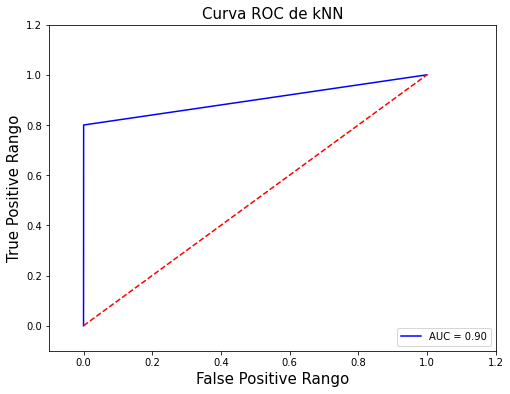

In [ ]:
#Curva ROC 
fpr, tpr, threshold = roc_curve(test_etiquetas, prediccion)
roc_auc = auc(fpr, tpr) #Area bajo la curva

plt.figure(figsize = (8, 6))
plt.title('Curva ROC de kNN', fontsize=15)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rango', fontsize=15)
plt.xlabel('False Positive Rango', fontsize=15)
plt.show()


In [ ]:
#print(KNN_best.predict(test_caracteristicas)[0:10])

print (len(test_etiquetas[test_etiquetas==1]))

resultado = np.where(test_etiquetas==1)[0]
print (resultado)

entrada = test_caracteristicas[2028]

print ()
print ("Entrada:", entrada)
print ()

if KNN_best.predict([entrada])[0]==1:
  print ("Fraude")
else:
  print ("No fraude")  

50
[ 1171  2255  2712  3012  3200  4318  4388  4449  5558  6706  6907  6974
  7765  7894 10036 10435 11400 12598 12973 13076 14051 14397 14574 14844
 14869 15772 16125 16674 16678 16814 17090 17217 18176 18864 18906 19969
 22092 22397 22496 23134 23471 24169 24848 25312 25544 26934 27264 27270
 27747 28143]

Entrada: [ 7.94343010e-03 -9.82336351e-03  5.40891522e-03 -1.25293922e-02
 -5.93730094e-03  1.04212574e-02 -7.91608195e-03  4.75725816e-03
  1.75823809e-02 -1.25945108e-02  4.65669105e-03  8.92015033e-03
 -2.01454620e-03 -4.07328620e-04  2.22280830e-02 -1.50264452e-02
  1.03051520e-02 -1.53581877e-02 -8.19216824e-03 -1.34994228e-04
  2.66557502e-03  9.19531043e-03 -6.25263954e-04 -7.96239227e-03
  1.13228179e-03  2.09844643e-03  8.61270075e-04  2.42001223e-04
  9.98779632e-01]

No fraude
